# DATASET RESTAURANTE

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
import pandas as pd

In [9]:
sns.get_dataset_names() 

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [10]:
tips=sns.load_dataset("tips")
tips.head(6)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4


In [11]:
tips.columns #  Lo primero que hacemos despues de cargar el dataframe, es ver todas las variables que tiene.

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [50]:
tips.columns=["Cuenta total","Propina","Sexo","Fumador","Dia","Horario","Talla"]
tips.head(13)

,Cuenta total,Propina,Sexo,Fumador,Dia,Horario,Talla
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


# 1 LIMPIEZA DE DATOS

In [13]:
tips.info()                                                                             # Podemos observar que no hay datos faltantes entre las variables, 244 individos por variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Cuenta total  244 non-null    float64 
 1   Propina       244 non-null    float64 
 2   Sexo          244 non-null    category
 3   Fumador       244 non-null    category
 4   Dia           244 non-null    category
 5   Horario       244 non-null    category
 6   Talla         244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [14]:
tips.shape[0]                                                                          # cantidad de clientes analizados, cada uno con 7 variables.

244

In [15]:
tips.isnull().sum()                                                                    # podemos ver que no hay datos faltantes para cada variable. 

Cuenta total    0
Propina         0
Sexo            0
Fumador         0
Dia             0
Horario         0
Talla           0
dtype: int64

In [16]:
tips.size                                                                              # numero total de datos

1708

## 1.1 LIMPIEZA DE DATOS CUANTITATIVOS

In [8]:
tips.describe() # Las desviaciones standar son distinta de cero (std desigual a 0), osea que las variables no estan conformadas de un unico valor numerico.

,Cuenta total,Propina,Talla
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


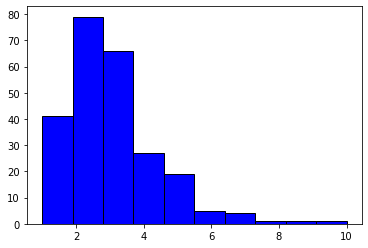

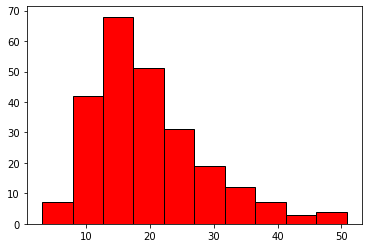

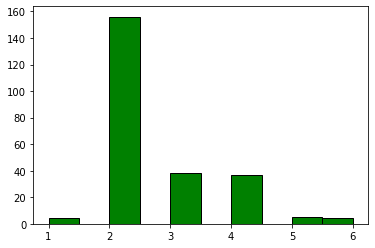

In [46]:
plt.hist (tips["Propina"],color="blue", ec="black")
plt.show()
plt.hist (tips["Cuenta total"],color="red", ec="black")
plt.show()
plt.hist (tips["Talla"],color="green", ec="black")
plt.show()

### DETERMINAMOS LAS MODAS

In [49]:
tips["Cuenta total"].mode()

0    13.42
Name: Cuenta total, dtype: float64

In [47]:
tips["Propina"].mode()

0    2.0
Name: Propina, dtype: float64

In [51]:
tips["Talla"].mode()

0    2
Name: Talla, dtype: int64

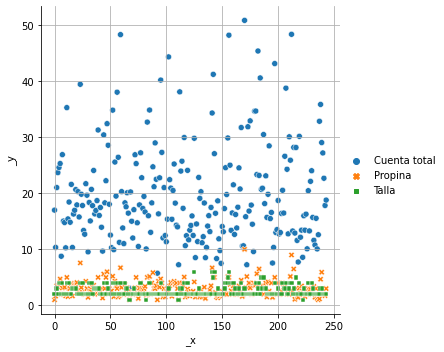

In [32]:
relacion=sns.relplot(data=tips)
plt.grid(True)
plt.show()

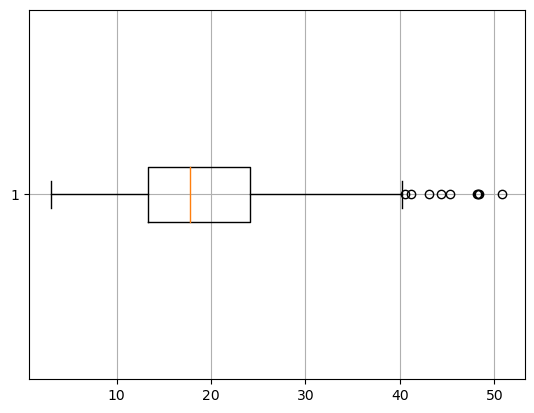

Podemos obervar que aquellas personas que pagaron >$40, son casos excepcionales


In [21]:
plt.boxplot(tips["Cuenta total"],vert=False)                      # Utilizamos esta herramienta para ver coherenciaS (Ej:Valores negativos)
                                                                  # Ademas lo utilizamos para idenficar los datos anomalos que puede alterar las conclusione
plt.grid(True)
plt.show()
print("Podemos obervar que aquellas personas que pagaron >$40, son casos excepcionales")

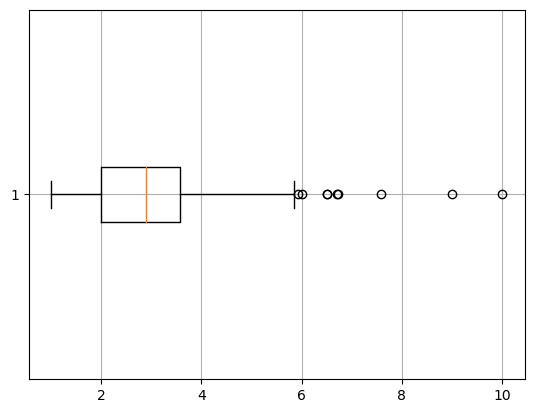

podemos obsvar que aquellos que pagaron proponinas >$6, son excepcionales


In [23]:
plt.boxplot(tips["Propina"],vert=False)  
plt.grid(True)
plt.show()
print("podemos obsvar que aquellos que pagaron proponinas >$6, son excepcionales")

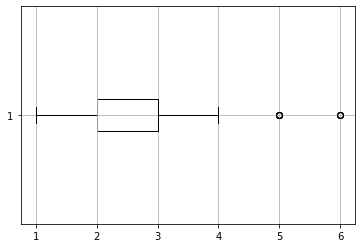

podemos obsvar que aquellos que pagaron proponinas >$6, son excepcionales


In [52]:
plt.boxplot(tips["Talla"],vert=False)  
plt.grid(True)
plt.show()
print("podemos obsvar que aquellos que pagaron proponinas >5, son excepcionales")

## 1.1 LIMPIEZA DE DATOS CATEGORICOS

In [55]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ["Sexo","Fumador","Dia","Horario","Horario"]
for col in cols_cat:
   print(f'Columna {col}: {tips[col].nunique()} subniveles')  # Todas las variables categoricas tienen mas de un subnivel, no hay que eleliminar columna

Columna Sexo: 2 subniveles
Columna Fumador: 2 subniveles
Columna Dia: 4 subniveles
Columna Horario: 2 subniveles
Columna Horario: 2 subniveles
